## Log Transform on Yelp Reviews Dataset¶


Visualizing the distribution of review counts before and after log
transform


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import log10

In [3]:
# load data about businesses
biz_df = pd.read_json("/home/garvit/Downloads/yelp_academic_dataset_business.json", lines=True)

In [4]:
biz_df.sample(4)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
88642,VyqC3N2iBtR6PczQGafe5w,Diner On 55th,1328 E 55th St,Cleveland,OH,44103,41.522818,-81.652286,3.5,24,1,"{'BusinessParking': '{'garage': False, 'street...","Diners, Restaurants, Breakfast & Brunch","{'Monday': '6:0-15:0', 'Tuesday': '6:0-15:0', ..."
35681,v9xKAVargdNtCh-eZmtREg,OverDubb Studio,4680 Polaris Ave,Las Vegas,NV,89103,36.104855,-115.185164,5.0,3,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Recording & Rehearsal Studios, Local Services","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
66332,2zwYpObaO4BHGgd5f4-Mng,Tad James Company,1459 Grub Stake Cir,Henderson,NV,89014,36.077178,-115.051084,3.5,3,1,None,"Adult Education, Education",None
136232,lAo90MG7eCN6otc3D7b6Mg,Slade Landscape Maintenance,1053 E Lockwood St,Mesa,AZ,85203,33.455562,-111.807534,4.0,7,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Gardeners, Landscape Architects, Landscaping, ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


Text(0, 0.5, 'Occurrence')

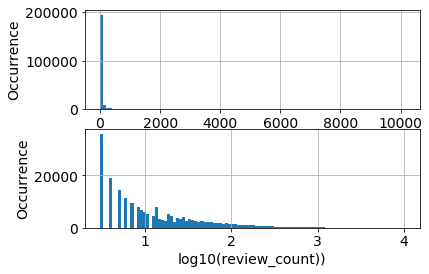

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1)

biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)

biz_df['review_count'].apply(lambda x:log10(x)).hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)

## Power Transforms: Generalization of the Log Transform


### Box-Cox Power Transformation

 Box-Cox transformation of Yelp business review counts


In [9]:
from scipy import stats

# Continuing from the previous example, assume biz_df contains
# the Yelp business reviews data.
# The Box-Cox transform assumes that input data is positive.
# Check the min to make sure.

biz_df['review_count'].min()

3

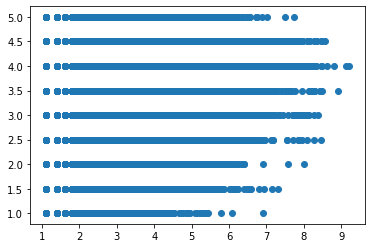

In [22]:
# Setting input parameter lmbda to 0 gives us the log transform (without constant offset)
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
plt.scatter(rc_log, biz_df['stars'])

In [40]:
# By default, the scipy implementation of Box-Cox transform finds the lambda
# parameter that will make the output the closest to a normal distribution
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.3528981448601063

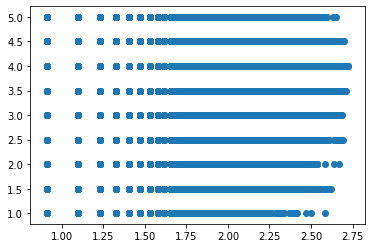

In [41]:
# using bc_params (figured value of lambda) 
plt.scatter(rc_bc, biz_df['stars'])

Visualizing the histograms of original, log transformed, and Box-Cox
transformed counts


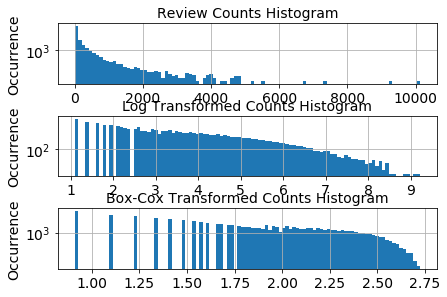

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
plt.tight_layout()

# original review count histogram
biz_df['review_count'].hist(ax = ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# review count after log transform
biz_df['rc_log'] = rc_log
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize= 14)

# review count after optimal Box-Cox transform
biz_df['rc_bc'] = rc_bc
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)


plt.show()

Probability plots of original and transformed counts against the normal
distribution


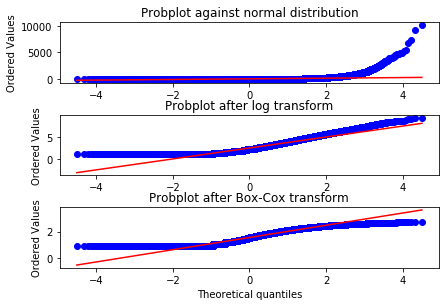

In [44]:
fig2, (ax1, ax2, ax3) = plt.subplots(3,1)
plt.tight_layout()

prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')

prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')

plt.show()